In [75]:
import scipy.special
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.decomposition import MiniBatchDictionaryLearning

In [76]:
file_path = './data/assignmentImageDenoising_phantom.mat'
mat = scipy.io.loadmat(file_path)

In [77]:
print(mat.keys())
Noisy = mat['imageNoisy']
Original = mat['imageNoiseless']
print(f"header: {mat['__header__']}")
print(f"version: {mat['__version__']}")
print(f"globals: {mat['__globals__']}")
print(f"Noisy.shape: {Noisy.shape}")
print(f"Original.shape: {Original.shape}")

dict_keys(['__header__', '__version__', '__globals__', 'imageNoiseless', 'imageNoisy'])
header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 27 00:08:21 2021'
version: 1.0
globals: []
Noisy.shape: (256, 256)
Original.shape: (256, 256)


Figure(640x480)


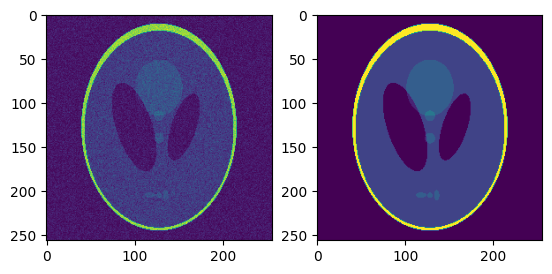

In [78]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(Noisy)
# axs[0].title('Noisy Brain MRI')
axs[1].imshow(Original)
# axs[1].title('Original Brain MRI')
print(fig)

In [79]:
print(Noisy.shape)
print(Original.shape)
# print(Noisy.dtype)

(256, 256)
(256, 256)


In [80]:
# Noise Model
# We have picked Rician Noise model here
def noise_model(x, y, alpha):
    beta = 1 - alpha
    noise = np.log(beta*y) - beta*(y**2 + x**2)/2 + np.log(scipy.special.i0(beta*y*x))
    del_noise = beta*x - (scipy.special.i1(beta*y*x)/scipy.special.i0(beta*y*x))*beta*y
    return noise, del_noise

In [81]:
# Quadratic prior
def quadratic_prior(x, y):
    quad_prior = (np.abs(x-y))**2
    del_quad_prior = 2 * np.abs(x-y)
    return quad_prior, del_quad_prior

# Discontinuity-adaptive Huber prior
def adaptive_huber(x, y, gamma):
    u = np.abs(x-y)
    if u <= gamma:
        huber = 0.5 * u**2
        del_huber = u
    else:
        huber = gamma * u - 0.5 * gamma**2
        del_huber = gamma
    
    return huber, del_huber

# Discontinuity-adaptive prior
def disco_adaptive(x, y, gamma):
    u = np.abs(x-y)
    disco_adap = gamma*u - gamma**2 * np.log(1 + u/gamma)
    del_disco_adap = gamma - gamma/(gamma + u)

    return disco_adap, del_disco_adap

In [82]:
# Calculating the prior for entire image:
def calc_prior(x, y, gamma=None):
    # Will write code here
    pass

# Calculating the posterior:
def calc_posterior(x, y, gamma=None):
    # Will write code here
    pass

In [83]:
# Function for RRMSE:
def rrmse(A,B):
    #Here A and B is noiseless image and noisy image
    num=np.sum((np.abs(A)-np.abs(B))**2)
    den=np.sum(np.abs(A)**2)
    rrmse=np.sqrt(num/den)
    return rrmse 

In [84]:
# Calculate RRMSE for the initial Noisy and Original image here
print(rrmse(Original, Noisy))

0.29857915712437444


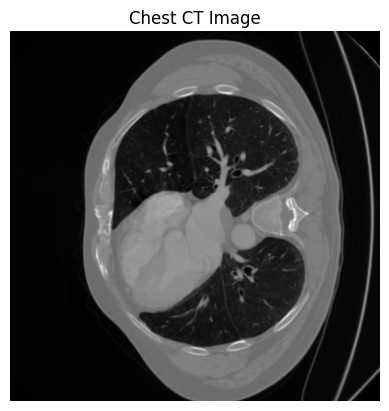

In [85]:
file_path = './data/assignmentImageDenoising_chestCT.mat'

with h5py.File(file_path, 'r') as mat:
    dataset_name = list(mat.keys())[0]  # Assuming first key is the image
    image_data = np.array(mat[dataset_name])  # Convert to NumPy array
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()

In [86]:
print(image_data.shape)

(512, 512)


In [87]:
#Question 4
def patches(image, size):
    patches=[]
    height, width=image.shape
    for i in range(0, height-size[0]):
        for j in range(0, width-size[1]):
             patch = image[i:i + size[0], j:j + size[1]].flatten()
             patches.append(patch)
    return np.array(patches)

In [88]:
ix=patches(image_data, (8,8))
print(ix.shape)

(254016, 64)


In [105]:
def objective_function(X, D, R, lambda_, p):
    reconstruction_error = np.sum((X - D.dot(R.T)) ** 2) 
    sparsity_penalty = lambda_ * np.sum(np.linalg.norm(R, ord=p, axis=1)**p) 
    return reconstruction_error + sparsity_penalty

def dictionary(patches,K=64, lambda_=0.1, p=1):
    learner = MiniBatchDictionaryLearning(n_components=K, alpha=lambda_, fit_algorithm='lars')
    D=learner.fit(patches).components_
    return D

In [106]:
D=dictionary(ix)
print(D.shape)

(64, 64)


In [107]:
print(D)

[[-0.12402162 -0.12470038 -0.12491445 ... -0.12484472 -0.12394774
  -0.1232802 ]
 [ 0.20197071  0.18309334  0.14502785 ... -0.06965966 -0.10948913
  -0.12774749]
 [ 0.14257631  0.15849299  0.17058654 ... -0.21400804 -0.20334516
  -0.18413407]
 ...
 [-0.17717891 -0.16990128 -0.12390295 ... -0.03420953 -0.00143478
   0.05204649]
 [ 0.07696064  0.1384422   0.15030753 ...  0.03995439  0.01423881
   0.01019779]
 [ 0.08851847  0.08599811  0.09440979 ...  0.12536675  0.13578948
   0.11809454]]


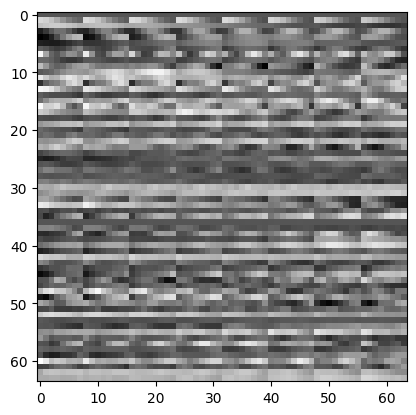

In [108]:
plt.imshow(D, cmap='gray')

In [96]:
def dictionary(patches, K=64, lambda_=0.1, p=2, n_iter=500):
    learner = MiniBatchDictionaryLearning(n_components=K, alpha=lambda_, fit_algorithm='lars')
    D=learner.fit(patches).components_       
    return D

print(dictionary(ix))

def dictionary(patches, K=64, lambda_=0.1, p=1.6, n_iter=500):
    learner = MiniBatchDictionaryLearning(n_components=K, alpha=lambda_, fit_algorithm='lars')
    D=learner.fit(patches).components_       
    return D

print(dictionary(ix))

def dictionary(patches, K=64, lambda_=0.1, p=1.2, n_iter=500):
    learner = MiniBatchDictionaryLearning(n_components=K, alpha=lambda_, fit_algorithm='lars')
    D=learner.fit(patches).components_       
    return D

print(dictionary(ix))

def dictionary(patches, K=64, lambda_=0.1, p=0.8, n_iter=500):
    learner = MiniBatchDictionaryLearning(n_components=K, alpha=lambda_, fit_algorithm='lars')
    D=learner.fit(patches).components_       
    return D

print(dictionary(ix))

[[-0.12471245 -0.12415054 -0.12453224 ... -0.12456735 -0.1243484
  -0.1236891 ]
 [ 0.16057205  0.14090271  0.10130298 ... -0.12534851 -0.16312628
  -0.18327329]
 [ 0.03106884  0.04862495  0.05849852 ... -0.21925205 -0.20762248
  -0.1903778 ]
 ...
 [ 0.11195463  0.11598283  0.13470801 ...  0.11445465  0.08978684
   0.09124215]
 [-0.13278857 -0.1526225  -0.16316239 ... -0.10361094 -0.09824887
  -0.09740477]
 [-0.03307023 -0.06080126 -0.07790099 ... -0.14985231 -0.15068659
  -0.15742397]]
[[-0.12374703 -0.1243582  -0.12452216 ... -0.12469307 -0.12439269
  -0.1236366 ]
 [ 0.07797445  0.05902526  0.028434   ... -0.16144559 -0.19762632
  -0.21279966]
 [ 0.17219159  0.19095007  0.21031616 ... -0.08459899 -0.06550818
  -0.04537672]
 ...
 [-0.01570634 -0.04880529 -0.09856222 ... -0.11406073 -0.1061237
  -0.09051736]
 [-0.34495333 -0.30839353 -0.18629728 ... -0.00723239 -0.02110588
  -0.04369181]
 [ 0.04536406 -0.07482908 -0.12230794 ... -0.08192288 -0.10775831
  -0.09897876]]
[[-0.12400165 -0.1

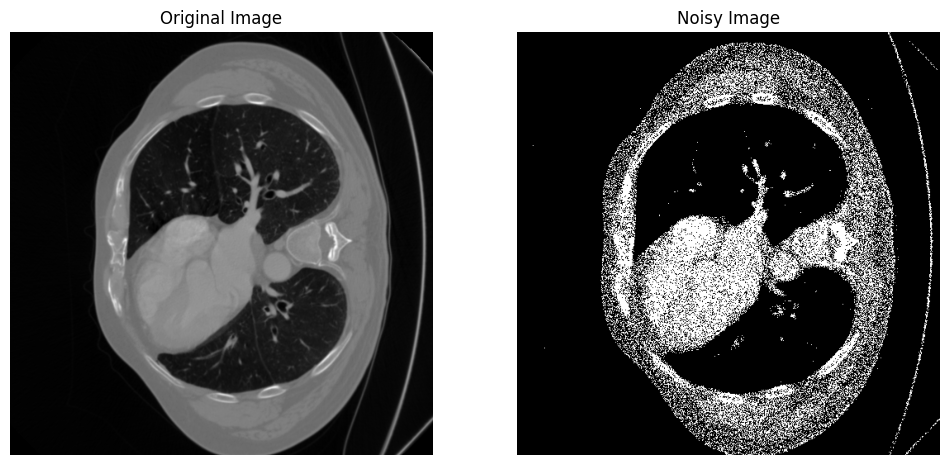

In [97]:
intensity_range = image_data.max() - image_data.min()
std_dev = 0.1 * intensity_range
noise = np.random.normal(0, std_dev, image_data.shape)
noisy_image = image_data + noise
noisy_image = np.clip(noisy_image, 0, 1)


plt.figure(figsize=(12, 6))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.show()
